<a href="https://colab.research.google.com/github/he4tnix/multimedia_tasks/blob/main/Actividad_4/Actividad_4_ContrerasPatricio_207676861.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Patricio Contreras</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


<ipython-input-2-ea25f1edca1d>:27: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(pulse)), pulse, use_line_collection=True)
<ipython-input-2-ea25f1edca1d>:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(filtered_impulse)), filtered_impulse, use_line_collection=True)
<ipython-input-2-ea25f1edca1d>:35: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, 

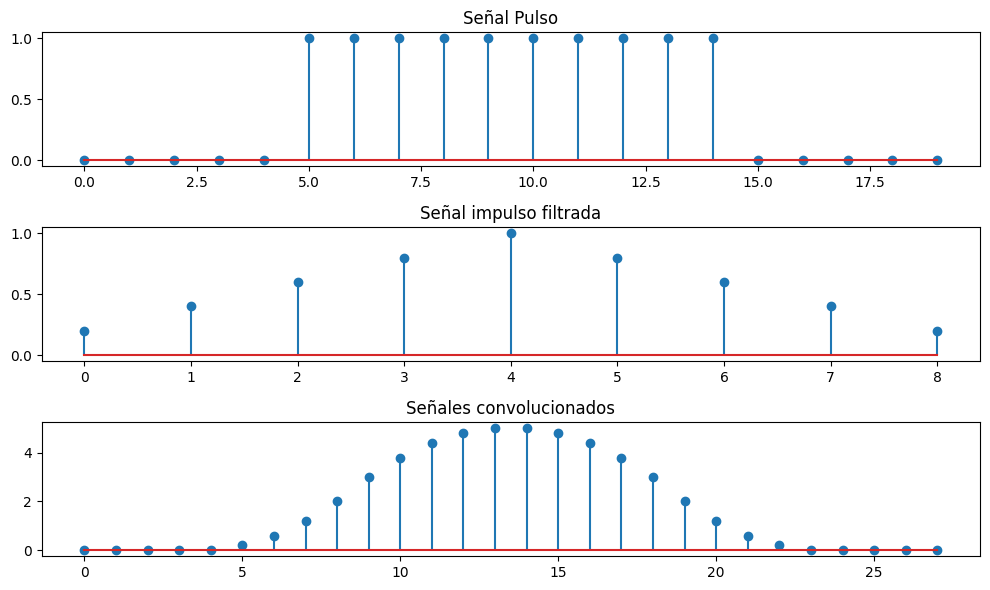

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Se crea una señal pulso
pulse = np.zeros(20)
pulse[5:15] = 1

#Luego una señal impulso filtrada
filtered_impulse = np.array([0.2, 0.4, 0.6, 0.8, 1, 0.8, 0.6, 0.4, 0.2])

#Se calcula la longitud del resultado de la convolución
n_len = len(pulse) + len(filtered_impulse) - 1

#
conv = np.zeros(n_len)

# Realizar la convolución
for i in range(n_len):
    for j in range(len(filtered_impulse)):
        if i - j >= 0 and i - j < len(pulse):
            conv[i] += pulse[i - j] * filtered_impulse[j]

# Graficar las señales
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.stem(range(len(pulse)), pulse, use_line_collection=True)
plt.title('Señal Pulso')
plt.subplot(3, 1, 2)
plt.stem(range(len(filtered_impulse)), filtered_impulse, use_line_collection=True)
plt.title('Señal impulso filtrada')
plt.subplot(3, 1, 3)
plt.stem(range(len(conv)), conv, use_line_collection=True)
plt.title('Señales convolucionadas')
plt.tight_layout()
plt.show()



## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


# Creación de señal

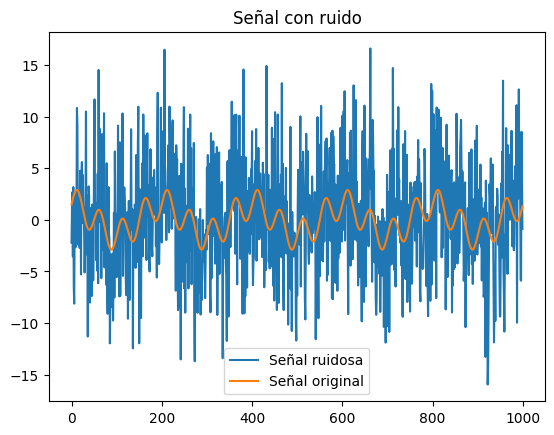

In [40]:
import numpy as np
import matplotlib.pyplot as plt

dt = 1/1000
t = np.arange(0, 1, dt) #time vector
freq = 20 #Hz
A = 1.5 #Amplitude
phi = 0 #offset

#Se crea una señal y se le agrega ruido
signal = A * (np.sin(2*np.pi*freq*t+phi)+np.cos(2*np.pi*freq*t/4+phi)) #señal
noise=5*np.random.randn(len(t)) #noise
signal_noisy= signal + noise #signal with noise
#Se calcula el valor medio de la señal con ruido
signal_mean = np.mean(signal_noisy)

#Se grafica la señal original y la señal con ruido
plt.figure(1)
plt.title('Señal con ruido')
plt.plot(signal_noisy, label='Señal ruidosa')
plt.plot(signal, label='Señal original')
plt.legend()
plt.show()


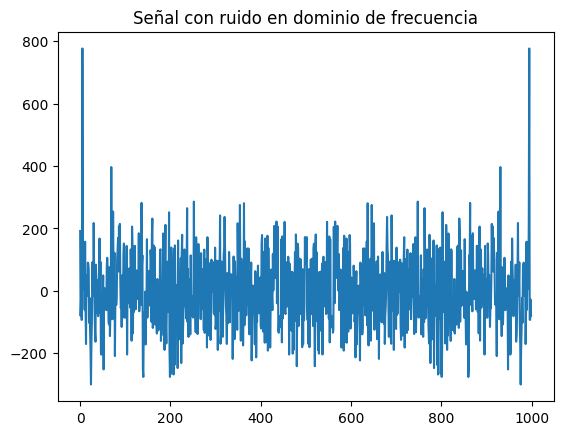

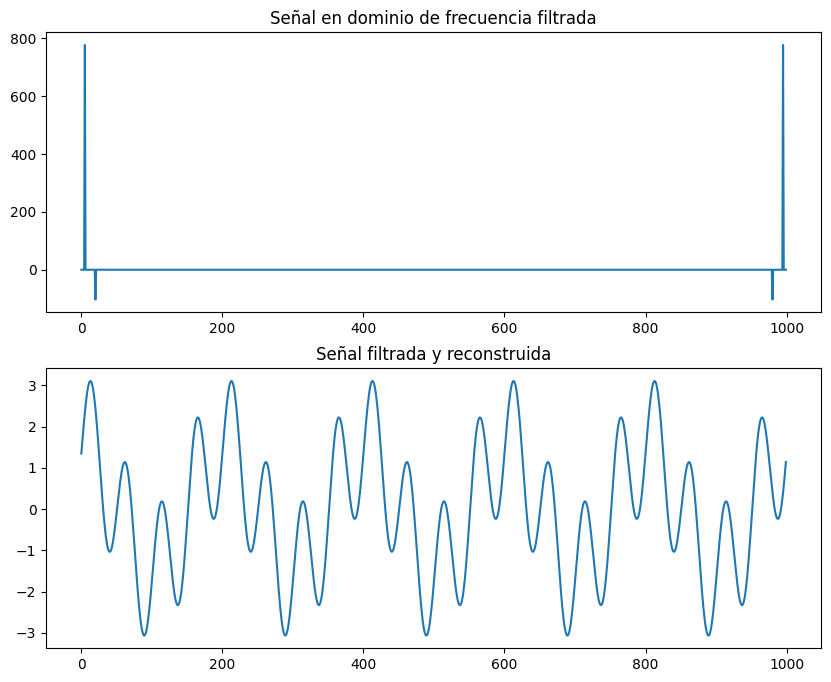

In [44]:
from scipy.fft import irfft

#Se define la cantidad de puntos para la fft en base al vector tiempo
n = len(t)
#Se calcula la fft de la señal con ruido
fhat = np.fft.fft(signal_noisy,n)
#Se calcula la PSD de la fft
PSD = fhat * np.conj(fhat)/n
#Se obtiene la frecuencia de la señal
freq = (1/(dt*n)*np.arange(n))
L = np.arange(1,np.floor(n/2),dtype='int')

#Se grafica la señal con ruido en el dominio de la frecuencia
plt.figure(2)
plt.title('Señal con ruido en dominio de frecuencia')
plt.plot(fhat)

#Se limpia la señal
indexs = PSD > 200 #Umbral de potencias
#Se multiplica el PSD por el umbral
PSD_CLEAN = PSD *indexs #Se limpia la PSD
#Se multiplica la señal en dominio frecuencial para solamente quedarse con los
#picos de mayor potencia que corresponden a la señal y no al ruido
fhat = indexs * fhat
#Se hace la transformada inversa de Fourier para obtener la señal filtrada original
signal_clean = np.fft.ifft(fhat)

#Se grafica la señal filtrada en dominio frecuencial y reconstruida en el temporal
plt.figure(3,figsize=(10,8))
plt.subplot(211)
plt.title('Señal en dominio de frecuencia filtrada')
plt.plot(fhat)
plt.subplot(212)
plt.title('Señal filtrada y reconstruida')
plt.plot(signal_clean)

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


In [46]:
import numpy as np
import matplotlib.pyplot as plt

#Se define la función
def mexican_hat(x, mu, sigma):

    #Se define la expresión
    z = (x**2/sigma**2)
    A = 2/(np.sqrt(3*sigma)*np.pi**(1/4))
    B = np.exp(-1/2*z)
    y = A* (1-z) * B
    #Retorna el vector resultante
    return y


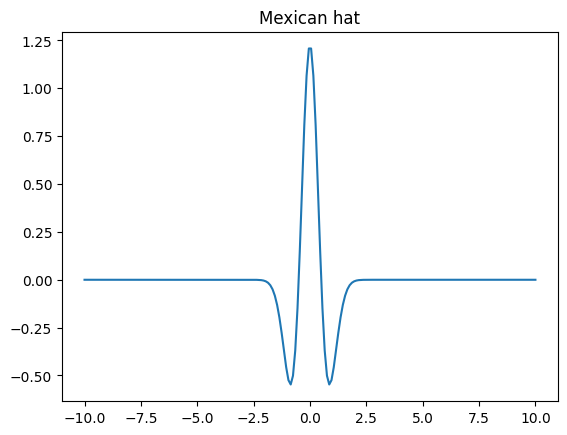

In [47]:
x = np.linspace(-10,10,200) #vector tiempo
mu = 1 #media
sigma = 0.5 #desviación estandar

y = mexican_hat(x, mu, sigma)

plt.title('Mexican hat')
plt.plot(x,y)

### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle

Se define la función "psi_mn" que toma una wavelet en uno de sus argumentos y le aumenta o disminuye su escala según la m que se tome, por otro lado el factor n desplaza la wavelet. Se hace un arreglo de ceros para la longitud de la wavelet ingresada y se interpola esta misma en un rango adecuado para que esta se escale y traslade adecuadamente.
Luego, se crea una wavelet y se guarda en psi, y se grafica la señal para tres n con un limite de grafica entre 0 y 350. Finalmente se inicia un bucle para m y n donde se grafican varias figuras en función de la cantidad de puntos que tengan los arreglos ns y ms.

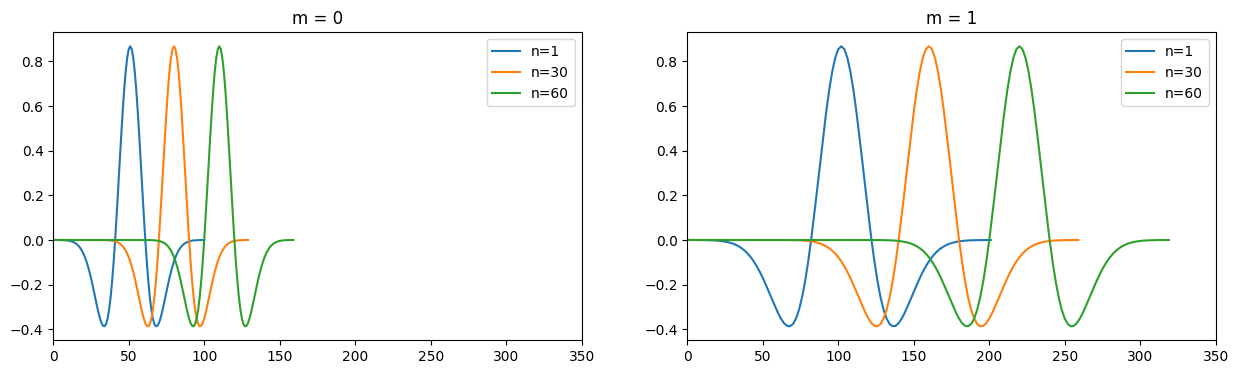

In [56]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

### 3.2.2 completa el siguiente código para realizar la transformada


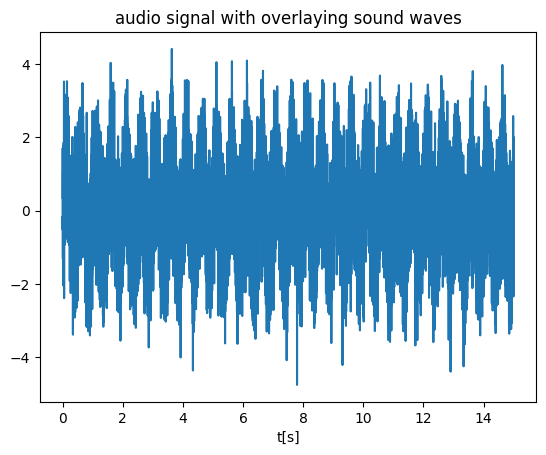

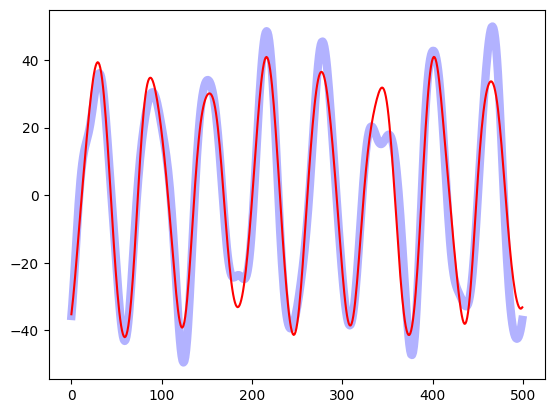

In [64]:

"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    """
    Calcula la transformada de wavelet en la sección de la señal dada, considerando una wavelet escalada y trasladada.

    Parámetros:
    - f: ndarray, la señal de entrada.
    - psi: ndarray, la wavelet madre.
    - m: int, el factor de escala.
    - n: int, el factor de traslación.

    Retorna:
    - float, el valor de la transformada de wavelet.
    """

    # Selecciona los puntos de la señal escalados según el factor de escala
    f_scaled = f[::2**m]

    # Calcula la transformada de wavelet sumando la contribución de la wavelet en la sección bajo estudio
    transform_scaled = 2**(m/2.0) * np.sum(f_scaled[n:n+len(psi)] * psi)

    return transform_scaled

"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    """
    Calcula la transformada de wavelet de manera ingenua, sumando sobre toda la longitud de la señal.

    Parámetros:
    - f: ndarray, la señal de entrada.
    - psi: ndarray, la wavelet madre.
    - m: int, el factor de escala.
    - n: int, el factor de traslación.

    Retorna:
    - float, el valor de la transformada de wavelet.
    """

    # Genera la wavelet escalada y trasladada
    pmn = psi_mn(psi, m, n)

    # Calcula la transformada de wavelet sumando sobre toda la longitud de la señal
    transform = 2**(-m/2.0) * np.sum(f[:len(pmn)] * pmn)

    return transform


m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:121: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


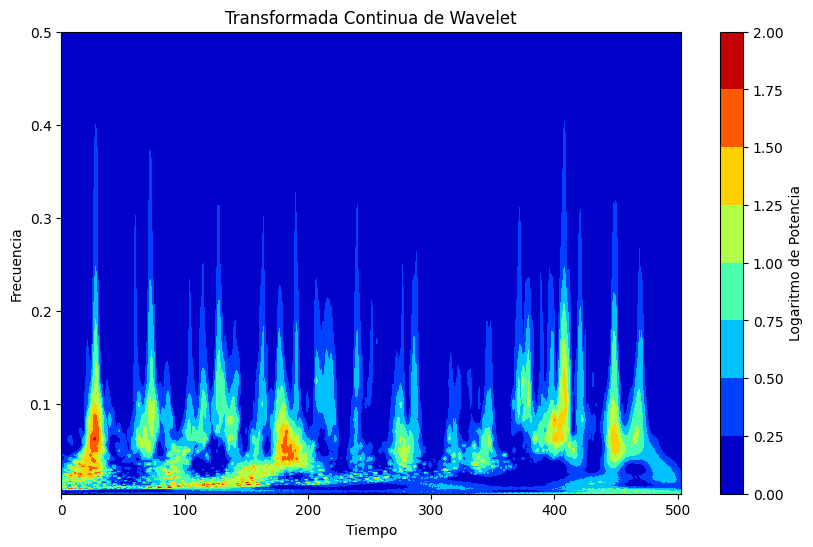

In [71]:
#Se importan librerias
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt

#Se carga el archivo con pandas
archivo = pd.read_csv("https://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat", delim_whitespace=True, header=None)

#Se extraen la cantidad de datos temporalmente
signal = archivo.iloc[:, 0]

#Se definen los parámetros de la transformada continua de wavelet
scales = np.arange(1, 128)  # Escalas
wavelet = 'cmor'  # Tipo de wavelet

#Se realiza la transformada continua de wavelet
coeficientes, frecuencias = pywt.cwt(signal, scales, wavelet)

#Se calcula la potencia de los coeficientes
potencia_coeficientes = np.abs(coeficientes) ** 2

#Se calcula la potencia de los coeficientes en una escala logarítmica
potencia_log = np.log1p(potencia_coeficientes)

#Se grafica la transformada en terminos de potencia
plt.figure(figsize=(10, 6))
plt.contourf(np.arange(len(signal)), frecuencias, potencia_log, cmap='jet')
plt.colorbar(label='Logaritmo de Potencia')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Transformada Continua de Wavelet')
plt.show()



### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

Representa como está distribuida la energía en el dominio temporal o de la frecuencia dentro del dominio del tiempo y la frecuencia, y lo que resalta en colores más calidos es aquello que posee mayor energía dentro del espectro observado a diferencia de lo que posee colores más fríos donde se encuentra la ausencia de potencia en el espectro.


## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/